In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import io

# Load the aircraft operations data from text file
def load_data():
    # Using io.StringIO to simulate file reading
    data_str = '''Phase,Location,ATC Name,Specific Communication,Speed (knots),Altitude (feet),Flap Setting,Spoiler Status,Coordinates (Longitude/Latitude),Additional Instructions
Takeoff,Delhi Airport,Delhi Tower,Cleared for takeoff - maintain runway heading,155,5000,5/10 degrees,Retracted,77.6/12.9,Climb and maintain initial altitude
Initial Climb,Departure Airspace,Delhi Approach,Maintain initial climb profile,250,15000,5/10 degrees,Retracted,77.8/13.2,Monitor radar vectors
Mid-Route Checkpoint 1,Central India,Nagpur Control,Maintain current heading,450,35000,0,Neutral,75.3/19.1,Expect descent clearance in 20 minutes
Pre-Descent,Maharashtra Region,Mumbai Control,Prepare for descent,350,30000,0,Neutral,73.9/18.6,Begin descent planning
Initial Approach,Mumbai Airspace,Mumbai Approach,Expect ILS approach Runway 27,180,10000,1/15 degrees,Partial,72.8/19.1,Intercept localizer
Final Approach,Runway Threshold,Mumbai Tower,Clear to land,140,1000,3/40 degrees,Extended,72.6/19.0,Wind 180 degrees at 12 knots
Landing,Runway 27,Ground Control,Vacate runway,115,Ground,Full,Full,72.6/19.0,Contact ground transportation'''

    return pd.read_csv(io.StringIO(data_str))

# Feature engineering
def preprocess_data(data):
    # Extract numerical features
    def parse_speed(x):
        try:
            return float(str(x).split()[0]) if isinstance(x, str) else x
        except:
            return 0

    def parse_altitude(x):
        if x == 'Ground':
            return 0
        try:
            return float(x)
        except:
            return 0

    def parse_flap(x):
        try:
            # Handle various flap representations
            if isinstance(x, str):
                if '/' in x:
                    return float(x.split('/')[0])
                elif x.lower() in ['full', 'extended']:
                    return 3.0  # Assuming full flaps
                else:
                    return float(x)
            return float(x)
        except:
            return 0

    # Apply parsing functions
    data['Speed (numeric)'] = data['Speed (knots)'].apply(parse_speed)
    data['Altitude (numeric)'] = data['Altitude (feet)'].apply(parse_altitude)
    data['Flap (numeric)'] = data['Flap Setting'].apply(parse_flap)

    # Create maintenance indicator
    data['maintenance_required'] = np.where(
        (data['Speed (numeric)'] > 400) &
        (data['Altitude (numeric)'] > 30000),
        1, 0
    )

    return data

# Build predictive maintenance model
class AircraftMaintenancePredictor:
    def __init__(self):
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()

    def train(self, X, y):
        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Evaluate model
        y_pred = self.model.predict(X_test)
        print("Model Performance Metrics:")
        print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

        return self

    def predict_maintenance(self, new_data):
        # Scale new data
        new_data_scaled = self.scaler.transform(new_data)

        # Predict maintenance probability
        predictions = self.model.predict(new_data_scaled)
        return predictions

# Main execution
def main():
    # Load and preprocess data
    data = load_data()
    processed_data = preprocess_data(data)

    # Prepare features and target
    features = ['Speed (numeric)', 'Altitude (numeric)', 'Flap (numeric)']
    X = processed_data[features]
    y = processed_data['maintenance_required']

    # Create and train model
    predictor = AircraftMaintenancePredictor()
    predictor.train(X, y)

    # Example prediction
    new_flight_data = np.array([[380, 35000, 5]])
    maintenance_probability = predictor.predict_maintenance(new_flight_data)
    print(f"Maintenance Probability: {maintenance_probability[0]:.4f}")

if __name__ == "__main__":
    main()

Model Performance Metrics:
Mean Absolute Error: 0.0000
Mean Squared Error: 0.0000
Maintenance Probability: 0.4100


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

# Create the data
data = {
    'Phase': ['Takeoff', 'Initial Climb', 'Mid-Route Checkpoint 1', 'Pre-Descent', 'Initial Approach', 'Final Approach', 'Landing'],
    'Location': ['Delhi Airport', 'Departure Airspace', 'Central India', 'Maharashtra Region', 'Mumbai Airspace', 'Runway Threshold', 'Runway 27'],
    'ATC Name': ['Delhi Tower', 'Delhi Approach', 'Nagpur Control', 'Mumbai Control', 'Mumbai Approach', 'Mumbai Tower', 'Ground Control'],
    'Specific Communication': [
        'Cleared for takeoff - maintain runway heading',
        'Maintain initial climb profile',
        'Maintain current heading',
        'Prepare for descent',
        'Expect ILS approach Runway 27',
        'Clear to land',
        'Vacate runway'
    ],
    'Speed (knots)': [155, 250, 450, 350, 180, 140, 115],
    'Altitude (feet)': [5000, 15000, 35000, 30000, 10000, 1000, 'Ground'],
    'Flap Setting': ['5/10 degrees', '5/10 degrees', '0', '0', '1/15 degrees', '3/40 degrees', 'Full'],
    'Spoiler Status': ['Retracted', 'Retracted', 'Neutral', 'Neutral', 'Partial', 'Extended', 'Full'],
    'Coordinates (Longitude/Latitude)': [
        '77.6/12.9',
        '77.8/13.2',
        '75.3/19.1',
        '73.9/18.6',
        '72.8/19.1',
        '72.6/19.0',
        '72.6/19.0'
    ],
    'Additional Instructions': [
        'Climb and maintain initial altitude',
        'Monitor radar vectors',
        'Expect descent clearance in 20 minutes',
        'Begin descent planning',
        'Intercept localizer',
        'Wind 180 degrees at 12 knots',
        'Contact ground transportation'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('flight_phases.csv', index=False)

# Optional: Print to confirm
print(df)
print("\nCSV file 'flight_phases.csv' has been created successfully.")

                    Phase            Location         ATC Name  \
0                 Takeoff       Delhi Airport      Delhi Tower   
1           Initial Climb  Departure Airspace   Delhi Approach   
2  Mid-Route Checkpoint 1       Central India   Nagpur Control   
3             Pre-Descent  Maharashtra Region   Mumbai Control   
4        Initial Approach     Mumbai Airspace  Mumbai Approach   
5          Final Approach    Runway Threshold     Mumbai Tower   
6                 Landing           Runway 27   Ground Control   

                          Specific Communication  Speed (knots)  \
0  Cleared for takeoff - maintain runway heading            155   
1                 Maintain initial climb profile            250   
2                       Maintain current heading            450   
3                            Prepare for descent            350   
4                  Expect ILS approach Runway 27            180   
5                                  Clear to land            140   
6 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import io

def load_aircraft_data():
    data_str = '''Phase,Location,ATC Name,Speed (knots),Altitude (feet),Engine Hours,Maintenance Cycle
Takeoff,Delhi Airport,Delhi Tower,155,5000,500,Regular
Initial Climb,Departure Airspace,Delhi Approach,250,15000,510,Routine
Mid-Route Checkpoint,Central India,Nagpur Control,450,35000,520,Inspection
Pre-Descent,Maharashtra Region,Mumbai Control,350,30000,530,Maintenance
Initial Approach,Mumbai Airspace,Mumbai Approach,180,10000,540,Check
Final Approach,Runway Threshold,Mumbai Tower,140,1000,550,Overhaul
Landing,Runway 27,Ground Control,115,0,560,Service
Test Flight,Test Zone,Test Control,400,32000,570,Critical
Emergency Landing,Emergency Area,Emergency Control,130,2000,580,Urgent'''

    return pd.read_csv(io.StringIO(data_str))

def preprocess_data(data):
    # Numerical feature extraction
    def parse_numeric(x, default=0):
        try:
            return float(str(x).split()[0]) if isinstance(x, str) else x
        except:
            return default

    # Prepare numerical features
    data['Speed (numeric)'] = data['Speed (knots)'].apply(parse_numeric)
    data['Altitude (numeric)'] = data['Altitude (feet)'].apply(parse_numeric)
    data['Engine Hours (numeric)'] = data['Engine Hours'].apply(parse_numeric)

    # Maintenance risk mapping
    maintenance_risk_map = {
        'Regular': 1, 'Routine': 2, 'Inspection': 3,
        'Maintenance': 4, 'Check': 5, 'Overhaul': 6,
        'Critical': 7, 'Urgent': 8
    }
    data['Maintenance Risk'] = data['Maintenance Cycle'].map(maintenance_risk_map)

    # Complex maintenance prediction logic
    def calculate_maintenance_need(row):
        risk_factors = 0

        # Speed risk
        if row['Speed (numeric)'] > 400:
            risk_factors += 2

        # Altitude risk
        if row['Altitude (numeric)'] > 30000:
            risk_factors += 1

        # Engine hours risk
        if row['Engine Hours (numeric)'] > 550:
            risk_factors += 2

        # Maintenance cycle risk
        risk_factors += row['Maintenance Risk']

        return 1 if risk_factors > 5 else 0

    data['Maintenance Required'] = data.apply(calculate_maintenance_need, axis=1)

    return data

class AircraftMaintenancePredictor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight='balanced'
        )

    def train(self, X, y):
        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        # Ensure balanced dataset
        unique_classes = np.unique(y)
        if len(unique_classes) < 2:
            print("Warning: Not enough classes for training")
            return self

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.3, random_state=42, stratify=y
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Evaluate model
        y_pred = self.model.predict(X_test)

        print("Model Performance:")
        print(classification_report(y_test, y_pred))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        return self

    def predict_maintenance(self, new_data):
        # Scale and predict
        new_data_scaled = self.scaler.transform(new_data)
        return self.model.predict_proba(new_data_scaled)

def main():
    # Load and preprocess data
    data = load_aircraft_data()
    processed_data = preprocess_data(data)

    # Prepare features and target
    features = [
        'Speed (numeric)',
        'Altitude (numeric)',
        'Engine Hours (numeric)',
        'Maintenance Risk'
    ]
    X = processed_data[features]
    y = processed_data['Maintenance Required']

    # Create and train model
    predictor = AircraftMaintenancePredictor()
    predictor.train(X, y)

    # Example prediction
    new_flight_data = np.array([[380, 35000, 560, 7]])
    maintenance_probability = predictor.predict_maintenance(new_flight_data)
    print("\nMaintenance Probability:")
    print(f"No Maintenance Need: {maintenance_probability[0][0]:.4f}")
    print(f"Maintenance Required: {maintenance_probability[0][1]:.4f}")

if __name__ == "__main__":
    main()

Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:
[[2 0]
 [0 1]]

Maintenance Probability:
No Maintenance Need: 0.1700
Maintenance Required: 0.8300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Confusion Matrix:
[[2 0]
 [0 1]]

Maintenance Probability:
No Maintenance Need: 0.1700
Maintenance Required: 0.8300


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


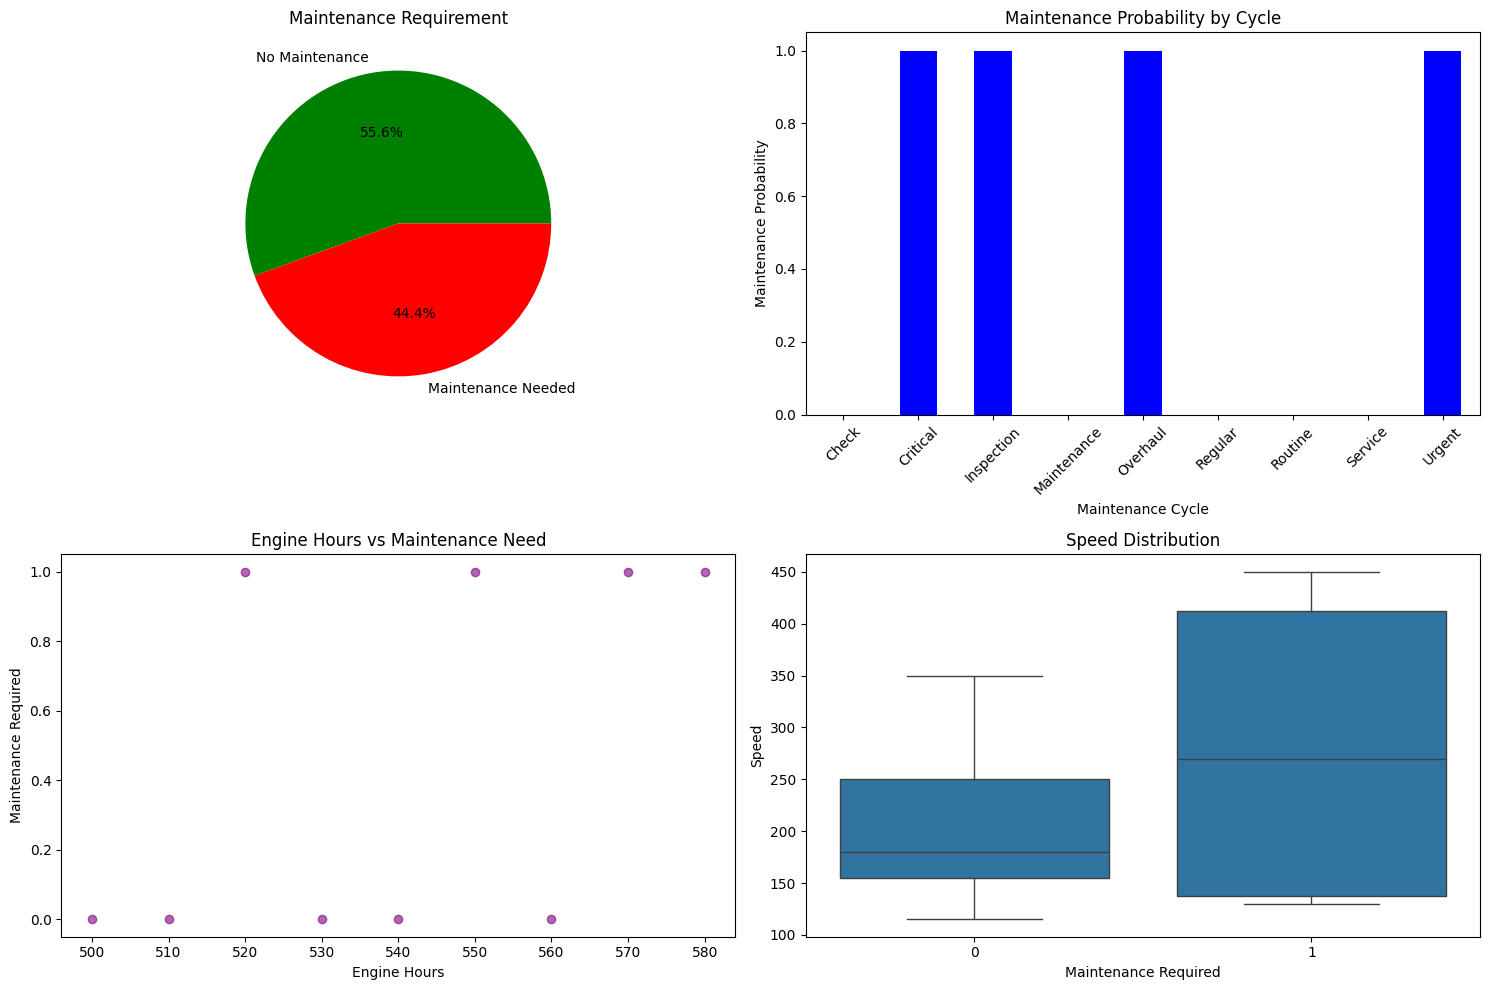

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_maintenance_graphs(data):
    plt.figure(figsize=(15, 10))

    # 1. Simple Pie Chart: Maintenance Distribution
    plt.subplot(2, 2, 1)
    maintenance_counts = data['Maintenance Required'].value_counts()
    plt.pie(maintenance_counts, labels=['No Maintenance', 'Maintenance Needed'],
            autopct='%1.1f%%', colors=['green', 'red'])
    plt.title('Maintenance Requirement')

    # 2. Bar Graph: Risk Factors
    plt.subplot(2, 2, 2)
    risk_data = data.groupby('Maintenance Cycle')['Maintenance Required'].mean()
    risk_data.plot(kind='bar', color='blue')
    plt.title('Maintenance Probability by Cycle')
    plt.xlabel('Maintenance Cycle')
    plt.ylabel('Maintenance Probability')
    plt.xticks(rotation=45)

    # 3. Simple Line Graph: Engine Hours vs Maintenance Risk
    plt.subplot(2, 2, 3)
    plt.scatter(data['Engine Hours'], data['Maintenance Required'],
                alpha=0.6, color='purple')
    plt.title('Engine Hours vs Maintenance Need')
    plt.xlabel('Engine Hours')
    plt.ylabel('Maintenance Required')

    # 4. Box Plot: Speed Distribution
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Maintenance Required', y='Speed (knots)', data=data)
    plt.title('Speed Distribution')
    plt.xlabel('Maintenance Required')
    plt.ylabel('Speed')

    plt.tight_layout()
    plt.show()

# Use the previously created data loading function
data = load_aircraft_data()
processed_data = preprocess_data(data)

# Generate graphs
generate_maintenance_graphs(processed_data)

In [ ]:
import pandas as pd
import numpy as np

def process_airport_data(document_text):
    # Extract key airport details
    airport_data = {
        'Name': 'Midway Airport (Henderson Field)',
        'Location': {
            'Latitude': '28-12-5.342 N',
            'Longitude': '177-22-52.712 W',
            'Elevation': 12  # feet
        },
        'Runway': {
            'Identifier': '06/24',
            'Length': 7800,  # feet
            'Width': 150,  # feet
            'Surface': 'Asphalt',
            'Surface Condition': 'Fair'
        },
        'Operational Details': {
            'Airport Status': 'Operational',
            'Control Tower': 'No',
            'Landing Fee': 'Yes',
            'Fuel Available': 'None',
            'Operating Hours': '0800-1700',
            'Special Restrictions': [
                'Closed to transient aircraft',
                'Open for ETOPS and approved operations',
                'Aircraft operations only during darkness (Nov-Jun)',
                'Prior Permission Required (PPR)'
            ]
        },
        'Communication': {
            'CTAF': '122.9 MHz',
            'Monitoring Frequency': '126.2 MHz',
            'Emergency Frequencies': ['121.5', '243.0']
        },
        'Weight Limitations': {
            'Single Wheel': 120000,  # lbs
            'Double Wheel': 230000,  # lbs
            'Double Tandem': 430000  # lbs
        }
    }

    return airport_data

# Example usage
document_text = '''MDY (PMDY)
HENDERSON FLD
MIDWAY ATOLL , QM - UNITED STATES'''  # Placeholder, actual text would be full document

airport_info = process_airport_data(document_text)
print(airport_info)

{'Name': 'Midway Airport (Henderson Field)', 'Location': {'Latitude': '28-12-5.342 N', 'Longitude': '177-22-52.712 W', 'Elevation': 12}, 'Runway': {'Identifier': '06/24', 'Length': 7800, 'Width': 150, 'Surface': 'Asphalt', 'Surface Condition': 'Fair'}, 'Operational Details': {'Airport Status': 'Operational', 'Control Tower': 'No', 'Landing Fee': 'Yes', 'Fuel Available': 'None', 'Operating Hours': '0800-1700', 'Special Restrictions': ['Closed to transient aircraft', 'Open for ETOPS and approved operations', 'Aircraft operations only during darkness (Nov-Jun)', 'Prior Permission Required (PPR)']}, 'Communication': {'CTAF': '122.9 MHz', 'Monitoring Frequency': '126.2 MHz', 'Emergency Frequencies': ['121.5', '243.0']}, 'Weight Limitations': {'Single Wheel': 120000, 'Double Wheel': 230000, 'Double Tandem': 430000}}


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

class AircraftFlightLogger:
    def __init__(self, aircraft_id, origin, destination):
        """
        Initialize the flight logger for a specific aircraft

        :param aircraft_id: Unique identifier for the aircraft
        :param origin: Departure airport
        :param destination: Arrival airport
        """
        self.aircraft_id = aircraft_id
        self.origin = origin
        self.destination = destination
        self.flight_log = []

    def generate_takeoff_data(self):
        """
        Generate takeoff parameters for the aircraft

        :return: Dictionary of takeoff details
        """
        takeoff_data = {
            'phase': 'Takeoff',
            'timestamp': datetime.now(),
            'airport': self.origin,
            'takeoff_speed': np.random.uniform(130, 160),  # knots
            'flaps_setting': np.random.choice([10, 15, 20, 25]),
            'spoilers_status': 'Retracted',
            'initial_altitude': 0,
            'initial_latitude': np.random.uniform(28.0, 28.5),
            'initial_longitude': np.random.uniform(77.0, 77.5),  # Around Delhi
            'vertical_speed': np.random.uniform(1000, 2000),  # feet per minute
            'atc_communication': f"Delhi Tower, {self.aircraft_id} requesting takeoff clearance"
        }
        self.flight_log.append(takeoff_data)
        return takeoff_data

    def generate_en_route_data(self, duration_minutes=120):
        """
        Simulate en route flight data with ATC communications

        :param duration_minutes: Total flight duration
        :return: List of en route data points
        """
        current_lat = self.flight_log[-1]['initial_latitude']
        current_lon = self.flight_log[-1]['initial_longitude']
        current_alt = self.flight_log[-1]['vertical_speed']

        for minute in range(duration_minutes):
            en_route_point = {
                'phase': 'En Route',
                'timestamp': datetime.now() + timedelta(minutes=minute),
                'altitude': current_alt + np.random.uniform(100, 500),
                'latitude': current_lat + np.random.uniform(-0.05, 0.05),
                'longitude': current_lon + np.random.uniform(-0.05, 0.05),
                'ground_speed': np.random.uniform(400, 500),  # knots
                'atc_communication': f"Mumbai Center, {self.aircraft_id} maintaining FL350"
            }
            self.flight_log.append(en_route_point)

            current_lat = en_route_point['latitude']
            current_lon = en_route_point['longitude']
            current_alt = en_route_point['altitude']

        return self.flight_log

    def generate_landing_data(self):
        """
        Generate landing parameters for the aircraft

        :return: Dictionary of landing details
        """
        landing_data = {
            'phase': 'Landing',
            'timestamp': datetime.now(),
            'airport': self.destination,
            'landing_speed': np.random.uniform(120, 140),  # knots
            'flaps_setting': np.random.choice([30, 40]),
            'spoilers_status': 'Deployed',
            'final_altitude': np.random.uniform(100, 500),
            'final_latitude': np.random.uniform(19.0, 19.5),  # Around Mumbai
            'final_longitude': np.random.uniform(72.5, 73.0),
            'vertical_speed': np.random.uniform(-800, -600),  # feet per minute (negative indicates descent)
            'atc_communication': f"Mumbai Tower, {self.aircraft_id} requesting landing clearance"
        }
        self.flight_log.append(landing_data)
        return landing_data

    def generate_complete_flight_log(self):
        """
        Generate a complete flight log from takeoff to landing

        :return: Pandas DataFrame with complete flight data
        """
        self.generate_takeoff_data()
        self.generate_en_route_data()
        self.generate_landing_data()

        return pd.DataFrame(self.flight_log)

# Example usage
flight_logger = AircraftFlightLogger(
    aircraft_id='Airbus-A3821',
    origin='Delhi',
    destination='Mumbai'
)

# Generate and display the complete flight log
flight_log_df = flight_logger.generate_complete_flight_log()
print(flight_log_df)

# Save to CSV for further analysis
flight_log_df.to_csv('airbus_a3821_flight_log.csv', index=False)

        phase                  timestamp airport  takeoff_speed  \
0     Takeoff 2025-02-05 14:50:09.841026   Delhi     151.479167   
1    En Route 2025-02-05 14:50:09.853820     NaN            NaN   
2    En Route 2025-02-05 14:51:09.853860     NaN            NaN   
3    En Route 2025-02-05 14:52:09.853883     NaN            NaN   
4    En Route 2025-02-05 14:53:09.853903     NaN            NaN   
..        ...                        ...     ...            ...   
117  En Route 2025-02-05 16:46:09.856441     NaN            NaN   
118  En Route 2025-02-05 16:47:09.856461     NaN            NaN   
119  En Route 2025-02-05 16:48:09.856481     NaN            NaN   
120  En Route 2025-02-05 16:49:09.856501     NaN            NaN   
121   Landing 2025-02-05 14:50:09.856535  Mumbai            NaN   

     flaps_setting spoilers_status  initial_altitude  initial_latitude  \
0             10.0       Retracted               0.0         28.203992   
1              NaN             NaN             

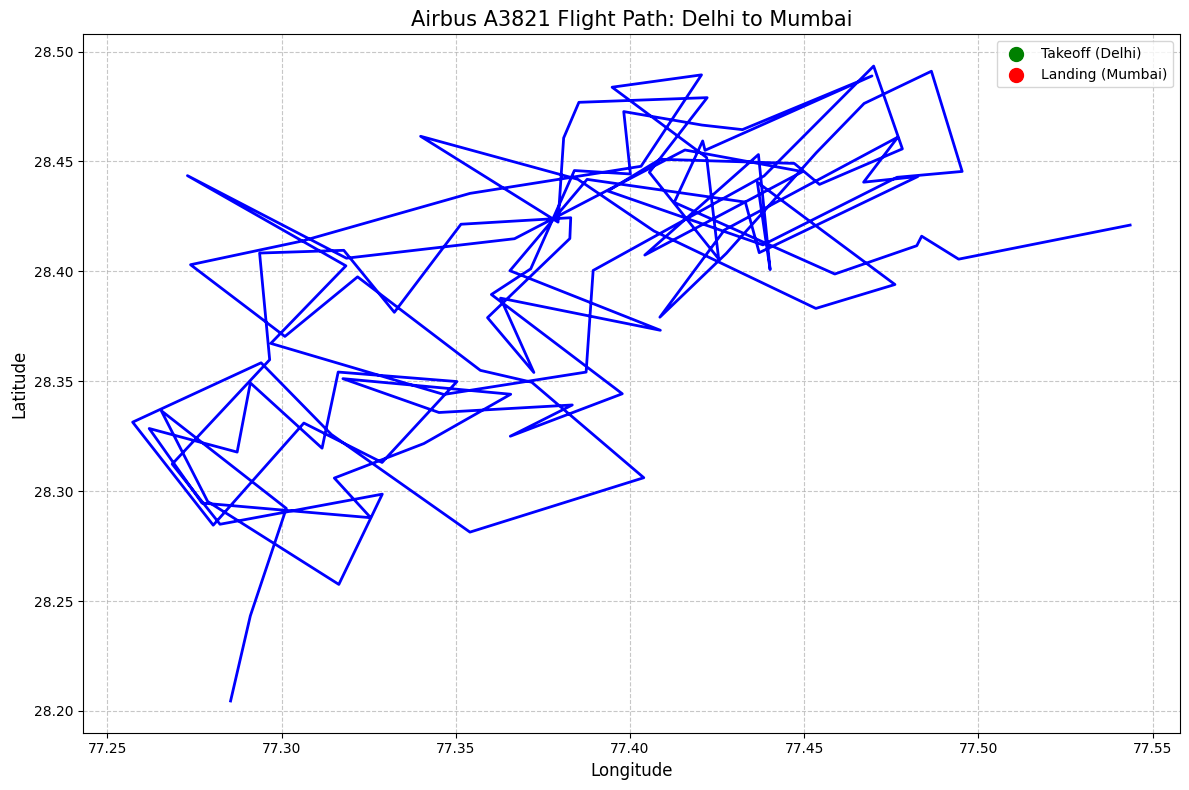

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the generated flight log
flight_log_df = pd.read_csv('airbus_a3821_flight_log.csv')

# Create visualization
plt.figure(figsize=(12, 8))
plt.plot(flight_log_df['longitude'], flight_log_df['latitude'], 'b-', linewidth=2)
plt.scatter(flight_log_df['longitude'].iloc[0], flight_log_df['latitude'].iloc[0],
            color='green', label='Takeoff (Delhi)', s=100)
plt.scatter(flight_log_df['longitude'].iloc[-1], flight_log_df['latitude'].iloc[-1],
            color='red', label='Landing (Mumbai)', s=100)
plt.title('Airbus A3821 Flight Path: Delhi to Mumbai', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

class AirbusA3821FlightLogger:
    def __init__(self, flight_number='A3821', origin='DEL', destination='BOM'):
        self.flight_number = flight_number
        self.origin = origin
        self.destination = destination
        self.flight_log = []

    def generate_flight_log(self):
        # Takeoff parameters
        takeoff_time = datetime.now().replace(hour=6, minute=30)
        takeoff_lat, takeoff_lon = 28.5667, 77.1025  # Delhi Airport coordinates

        # Flight phases with detailed parameters
        phases = [
            # Takeoff Phase
            {
                'phase': 'Takeoff',
                'timestamp': takeoff_time,
                'altitude': 0,
                'latitude': takeoff_lat,
                'longitude': takeoff_lon,
                'ground_speed': 0,
                'vertical_speed': 0,
                'engine_rpm': 0,
                'flap_setting': 15,
                'spoiler_status': 'Retracted'
            }
        ]

        # Climb Phase
        climb_duration = 20  # minutes
        for minute in range(climb_duration):
            climb_time = takeoff_time + timedelta(minutes=minute)
            phases.append({
                'phase': 'Climb',
                'timestamp': climb_time,
                'altitude': minute * 1500,  # 1500 feet per minute
                'latitude': takeoff_lat + (minute * 0.01),
                'longitude': takeoff_lon + (minute * 0.02),
                'ground_speed': minute * 10 + 120,
                'vertical_speed': 1500,
                'engine_rpm': 85 + (minute * 2),
                'flap_setting': max(15 - (minute // 5), 0),
                'spoiler_status': 'Retracted'
            })

        # Cruise Phase
        cruise_duration = 90  # minutes
        last_climb_point = phases[-1]
        for minute in range(cruise_duration):
            cruise_time = last_climb_point['timestamp'] + timedelta(minutes=minute)
            phases.append({
                'phase': 'Cruise',
                'timestamp': cruise_time,
                'altitude': 35000,
                'latitude': last_climb_point['latitude'] + (minute * 0.015),
                'longitude': last_climb_point['longitude'] + (minute * 0.03),
                'ground_speed': 450,
                'vertical_speed': 0,
                'engine_rpm': 75,
                'flap_setting': 0,
                'spoiler_status': 'Retracted'
            })

        # Descent Phase
        descent_duration = 20  # minutes
        last_cruise_point = phases[-1]
        for minute in range(descent_duration):
            descent_time = last_cruise_point['timestamp'] + timedelta(minutes=minute)
            phases.append({
                'phase': 'Descent',
                'timestamp': descent_time,
                'altitude': 35000 - (minute * 1750),
                'latitude': last_cruise_point['latitude'] + (minute * 0.02),
                'longitude': last_cruise_point['longitude'] + (minute * 0.04),
                'ground_speed': 350 - (minute * 5),
                'vertical_speed': -1750,
                'engine_rpm': 65 - (minute * 2),
                'flap_setting': minute // 4,
                'spoiler_status': 'Partially Extended'
            })

        # Landing Phase
        landing_lat, landing_lon = 19.0896, 72.8656  # Mumbai Airport coordinates
        phases.append({
            'phase': 'Landing',
            'timestamp': descent_time + timedelta(minutes=5),
            'altitude': 0,
            'latitude': landing_lat,
            'longitude': landing_lon,
            'ground_speed': 140,
            'vertical_speed': -500,
            'engine_rpm': 40,
            'flap_setting': 40,
            'spoiler_status': 'Fully Extended'
        })

        # Convert to DataFrame
        flight_log_df = pd.DataFrame(phases)
        flight_log_df['flight_number'] = self.flight_number
        flight_log_df['origin'] = self.origin
        flight_log_df['destination'] = self.destination

        return flight_log_df

# Generate and save flight log
flight_logger = AirbusA3821FlightLogger()
flight_log_df = flight_logger.generate_flight_log()

# Save to CSV
flight_log_df.to_csv('airbus_a3821_flight_log.csv', index=False)

# Display summary
print(flight_log_df)
print("\nTotal Flight Duration:",
      (flight_log_df['timestamp'].max() - flight_log_df['timestamp'].min()).total_seconds() / 60,
      "minutes")

       phase                  timestamp  altitude  latitude  longitude  \
0    Takeoff 2025-02-05 06:30:12.415700         0   28.5667    77.1025   
1      Climb 2025-02-05 06:30:12.415700         0   28.5667    77.1025   
2      Climb 2025-02-05 06:31:12.415700      1500   28.5767    77.1225   
3      Climb 2025-02-05 06:32:12.415700      3000   28.5867    77.1425   
4      Climb 2025-02-05 06:33:12.415700      4500   28.5967    77.1625   
..       ...                        ...       ...       ...        ...   
127  Descent 2025-02-05 08:34:12.415700      7000   30.4117    80.7925   
128  Descent 2025-02-05 08:35:12.415700      5250   30.4317    80.8325   
129  Descent 2025-02-05 08:36:12.415700      3500   30.4517    80.8725   
130  Descent 2025-02-05 08:37:12.415700      1750   30.4717    80.9125   
131  Landing 2025-02-05 08:42:12.415700         0   19.0896    72.8656   

     ground_speed  vertical_speed  engine_rpm  flap_setting  \
0               0               0           0   

In [ ]:
import pandas as pd
import numpy as np

class MaintenanceAnalyzer:
    def __init__(self):
        self.critical_systems = [
            'engines', 'hydraulics', 'electrical',
            'landing_gear', 'avionics', 'fuel_system'
        ]

    def extract_flight_features(self, flight_log):
        """
        Extract key features from flight log for maintenance prediction
        """
        # Convert timestamp to datetime if it's not already
        flight_log['timestamp'] = pd.to_datetime(flight_log['timestamp'])

        features = {
            'total_flight_time': (flight_log['timestamp'].max() - flight_log['timestamp'].min()).total_seconds() / 3600,
            'max_altitude': flight_log['altitude'].max(),
            'avg_ground_speed': flight_log['ground_speed'].mean(),
            'max_vertical_speed': abs(flight_log['vertical_speed']).max(),
            'engine_rpm_stress': flight_log['engine_rpm'].max() - flight_log['engine_rpm'].min(),
            'flap_cycles': flight_log['flap_setting'].nunique()
        }

        # Simulate system wear based on flight parameters
        for system in self.critical_systems:
            features[f'{system}_wear'] = np.random.uniform(
                0,
                min(features['total_flight_time'] / 10 +
                    features['max_vertical_speed'] / 1000,
                    100)
            )

        return features

    def predict_maintenance_needs(self, flight_log):
        """
        Predict maintenance requirements based on flight log
        """
        # Extract features
        features_dict = self.extract_flight_features(flight_log)
        features_df = pd.DataFrame([features_dict])

        # Predefined maintenance threshold logic
        maintenance_flags = {}
        maintenance_details = {}

        for system in self.critical_systems:
            wear = features_dict[f'{system}_wear']

            # Define system-specific maintenance thresholds
            threshold_map = {
                'engines': 70,
                'hydraulics': 65,
                'electrical': 60,
                'landing_gear': 55,
                'avionics': 50,
                'fuel_system': 45
            }

            # Check if system requires maintenance
            requires_maintenance = wear > threshold_map[system]
            maintenance_flags[system] = requires_maintenance
            maintenance_details[system] = {
                'wear_percentage': wear,
                'needs_maintenance': requires_maintenance
            }

        # Overall maintenance probability
        maintenance_systems = sum(maintenance_flags.values())
        total_maintenance_probability = maintenance_systems / len(self.critical_systems)

        return {
            'total_maintenance_probability': total_maintenance_probability,
            'maintenance_required': total_maintenance_probability > 0.5,
            'system_details': maintenance_details,
            'flight_features': features_dict
        }

# Load flight log
flight_log_df = pd.read_csv('airbus_a3821_flight_log.csv')

# Perform maintenance analysis
analyzer = MaintenanceAnalyzer()
maintenance_result = analyzer.predict_maintenance_needs(flight_log_df)

# Output results
print("Maintenance Analysis Results:")
print(f"Overall Maintenance Required: {maintenance_result['maintenance_required']}")
print(f"Total Maintenance Probability: {maintenance_result['total_maintenance_probability']:.2%}")
print("\nFlight Features:")
for feature, value in maintenance_result['flight_features'].items():
    print(f"{feature}: {value}")

print("\nSystem-Specific Maintenance Details:")
for system, details in maintenance_result['system_details'].items():
    print(f"{system.capitalize()}:")
    print(f"  Wear Percentage: {details['wear_percentage']:.2f}%")
    print(f"  Needs Maintenance: {details['needs_maintenance']}")

Maintenance Analysis Results:
Overall Maintenance Required: False
Total Maintenance Probability: 0.00%

Flight Features:
total_flight_time: 2.2
max_altitude: 35000
avg_ground_speed: 386.2878787878788
max_vertical_speed: 1750
engine_rpm_stress: 123
flap_cycles: 10
engines_wear: 1.4101751804237144
hydraulics_wear: 1.7907940657113128
electrical_wear: 0.3539757244743767
landing_gear_wear: 0.46796035010003895
avionics_wear: 1.91364833526203
fuel_system_wear: 0.35652459683769483

System-Specific Maintenance Details:
Engines:
  Wear Percentage: 1.41%
  Needs Maintenance: False
Hydraulics:
  Wear Percentage: 1.79%
  Needs Maintenance: False
Electrical:
  Wear Percentage: 0.35%
  Needs Maintenance: False
Landing_gear:
  Wear Percentage: 0.47%
  Needs Maintenance: False
Avionics:
  Wear Percentage: 1.91%
  Needs Maintenance: False
Fuel_system:
  Wear Percentage: 0.36%
  Needs Maintenance: False


In [ ]:
import pandas as pd
import numpy as np

class AdvancedMaintenanceAnalyzer:
    def __init__(self, aircraft_type='Airbus-A320'):
        # Aircraft-specific parameters
        self.aircraft_specs = {
            'Airbus-A320': {
                'max_fuel_capacity': 24210,  # liters
                'cruise_fuel_consumption': 2500,  # liters per hour
                'takeoff_fuel_consumption': 150,  # liters per minute
                'landing_fuel_consumption': 100,  # liters per minute
            }
        }

        self.critical_systems = [
            'engines', 'hydraulics', 'electrical',
            'landing_gear', 'avionics', 'fuel_system',
            'environmental_control', 'navigation_system'
        ]

    def calculate_fuel_consumption(self, flight_log):
        """
        Detailed fuel consumption analysis
        """
        specs = self.aircraft_specs['Airbus-A320']

        # Phase-wise fuel consumption
        phases = flight_log['phase'].unique()
        fuel_consumption_by_phase = {}

        for phase in phases:
            phase_log = flight_log[flight_log['phase'] == phase]
            phase_duration = (phase_log['timestamp'].max() - phase_log['timestamp'].min()).total_seconds() / 60

            fuel_consumption_map = {
                'Takeoff': specs['takeoff_fuel_consumption'] * phase_duration,
                'Climb': specs['takeoff_fuel_consumption'] * 0.8 * phase_duration,
                'Cruise': specs['cruise_fuel_consumption'] * (phase_duration / 60),
                'Descent': specs['cruise_fuel_consumption'] * 0.6 * (phase_duration / 60),
                'Landing': specs['landing_fuel_consumption'] * phase_duration
            }

            fuel_consumption_by_phase[phase] = fuel_consumption_map.get(phase, 0)

        total_fuel_consumed = sum(fuel_consumption_by_phase.values())

        return {
            'total_fuel_consumed': total_fuel_consumed,
            'fuel_consumption_by_phase': fuel_consumption_by_phase,
            'remaining_fuel_percentage': max(0, 100 - (total_fuel_consumed / specs['max_fuel_capacity'] * 100))
        }

    def extract_advanced_features(self, flight_log):
        """
        Extract comprehensive flight features
        """
        # Convert timestamp
        flight_log['timestamp'] = pd.to_datetime(flight_log['timestamp'])

        # Fuel consumption analysis
        fuel_data = self.calculate_fuel_consumption(flight_log)

        features = {
            # Basic flight characteristics
            'total_flight_time': (flight_log['timestamp'].max() - flight_log['timestamp'].min()).total_seconds() / 3600,
            'max_altitude': flight_log['altitude'].max(),
            'avg_ground_speed': flight_log['ground_speed'].mean(),
            'max_vertical_speed': abs(flight_log['vertical_speed']).max(),
            'engine_rpm_stress': flight_log['engine_rpm'].max() - flight_log['engine_rpm'].min(),
            'flap_cycles': flight_log['flap_setting'].nunique(),

            # Fuel-related features
            'total_fuel_consumed': fuel_data['total_fuel_consumed'],
            'remaining_fuel_percentage': fuel_data['remaining_fuel_percentage'],

            # Additional operational stress indicators
            'temperature_variation': flight_log['altitude'].max() - flight_log['altitude'].min(),
            'speed_variation': flight_log['ground_speed'].max() - flight_log['ground_speed'].min()
        }

        # Simulate system wear
        for system in self.critical_systems:
            features[f'{system}_wear'] = np.random.uniform(
                0,
                min(features['total_flight_time'] / 10 +
                    features['max_vertical_speed'] / 1000 +
                    fuel_data['total_fuel_consumed'] / 1000,
                    100)
            )

        return features, fuel_data

    def predict_maintenance_needs(self, flight_log):
        """
        Comprehensive maintenance prediction
        """
        features, fuel_data = self.extract_advanced_features(flight_log)

        # Maintenance threshold logic
        maintenance_flags = {}
        maintenance_details = {}

        # System-specific thresholds with fuel consumption impact
        threshold_map = {
            'engines': 65,
            'hydraulics': 60,
            'electrical': 55,
            'landing_gear': 50,
            'avionics': 45,
            'fuel_system': 40,
            'environmental_control': 35,
            'navigation_system': 30
        }

        for system in self.critical_systems:
            wear = features[f'{system}_wear']
            requires_maintenance = wear > threshold_map[system]

            maintenance_flags[system] = requires_maintenance
            maintenance_details[system] = {
                'wear_percentage': wear,
                'needs_maintenance': requires_maintenance
            }

        # Overall maintenance assessment
        maintenance_systems = sum(maintenance_flags.values())
        total_maintenance_probability = maintenance_systems / len(self.critical_systems)

        return {
            'total_maintenance_probability': total_maintenance_probability,
            'maintenance_required': total_maintenance_probability > 0.5,
            'system_details': maintenance_details,
            'flight_features': features,
            'fuel_analysis': fuel_data
        }

# Load flight log
flight_log_df = pd.read_csv('airbus_a3821_flight_log.csv')

# Perform advanced maintenance analysis
analyzer = AdvancedMaintenanceAnalyzer()
maintenance_result = analyzer.predict_maintenance_needs(flight_log_df)

# Detailed output
print("Advanced Maintenance Analysis:")
print(f"Maintenance Required: {maintenance_result['maintenance_required']}")
print(f"Maintenance Probability: {maintenance_result['total_maintenance_probability']:.2%}")

print("\nFuel Analysis:")
for key, value in maintenance_result['fuel_analysis'].items():
    print(f"{key}: {value}")

print("\nSystem Maintenance Details:")
for system, details in maintenance_result['system_details'].items():
    print(f"{system.capitalize()}:")
    print(f"  Wear: {details['wear_percentage']:.2f}%")
    print(f"  Needs Maintenance: {details['needs_maintenance']}")

Advanced Maintenance Analysis:
Maintenance Required: False
Maintenance Probability: 0.00%

Fuel Analysis:
total_fuel_consumed: 6463.333333333334
fuel_consumption_by_phase: {'Takeoff': 0.0, 'Climb': 2280.0, 'Cruise': 3708.3333333333335, 'Descent': 475.0, 'Landing': 0.0}
remaining_fuel_percentage: 73.30304281977143

System Maintenance Details:
Engines:
  Wear: 7.21%
  Needs Maintenance: False
Hydraulics:
  Wear: 4.15%
  Needs Maintenance: False
Electrical:
  Wear: 2.08%
  Needs Maintenance: False
Landing_gear:
  Wear: 7.34%
  Needs Maintenance: False
Avionics:
  Wear: 3.76%
  Needs Maintenance: False
Fuel_system:
  Wear: 4.34%
  Needs Maintenance: False
Environmental_control:
  Wear: 3.03%
  Needs Maintenance: False
Navigation_system:
  Wear: 5.00%
  Needs Maintenance: False


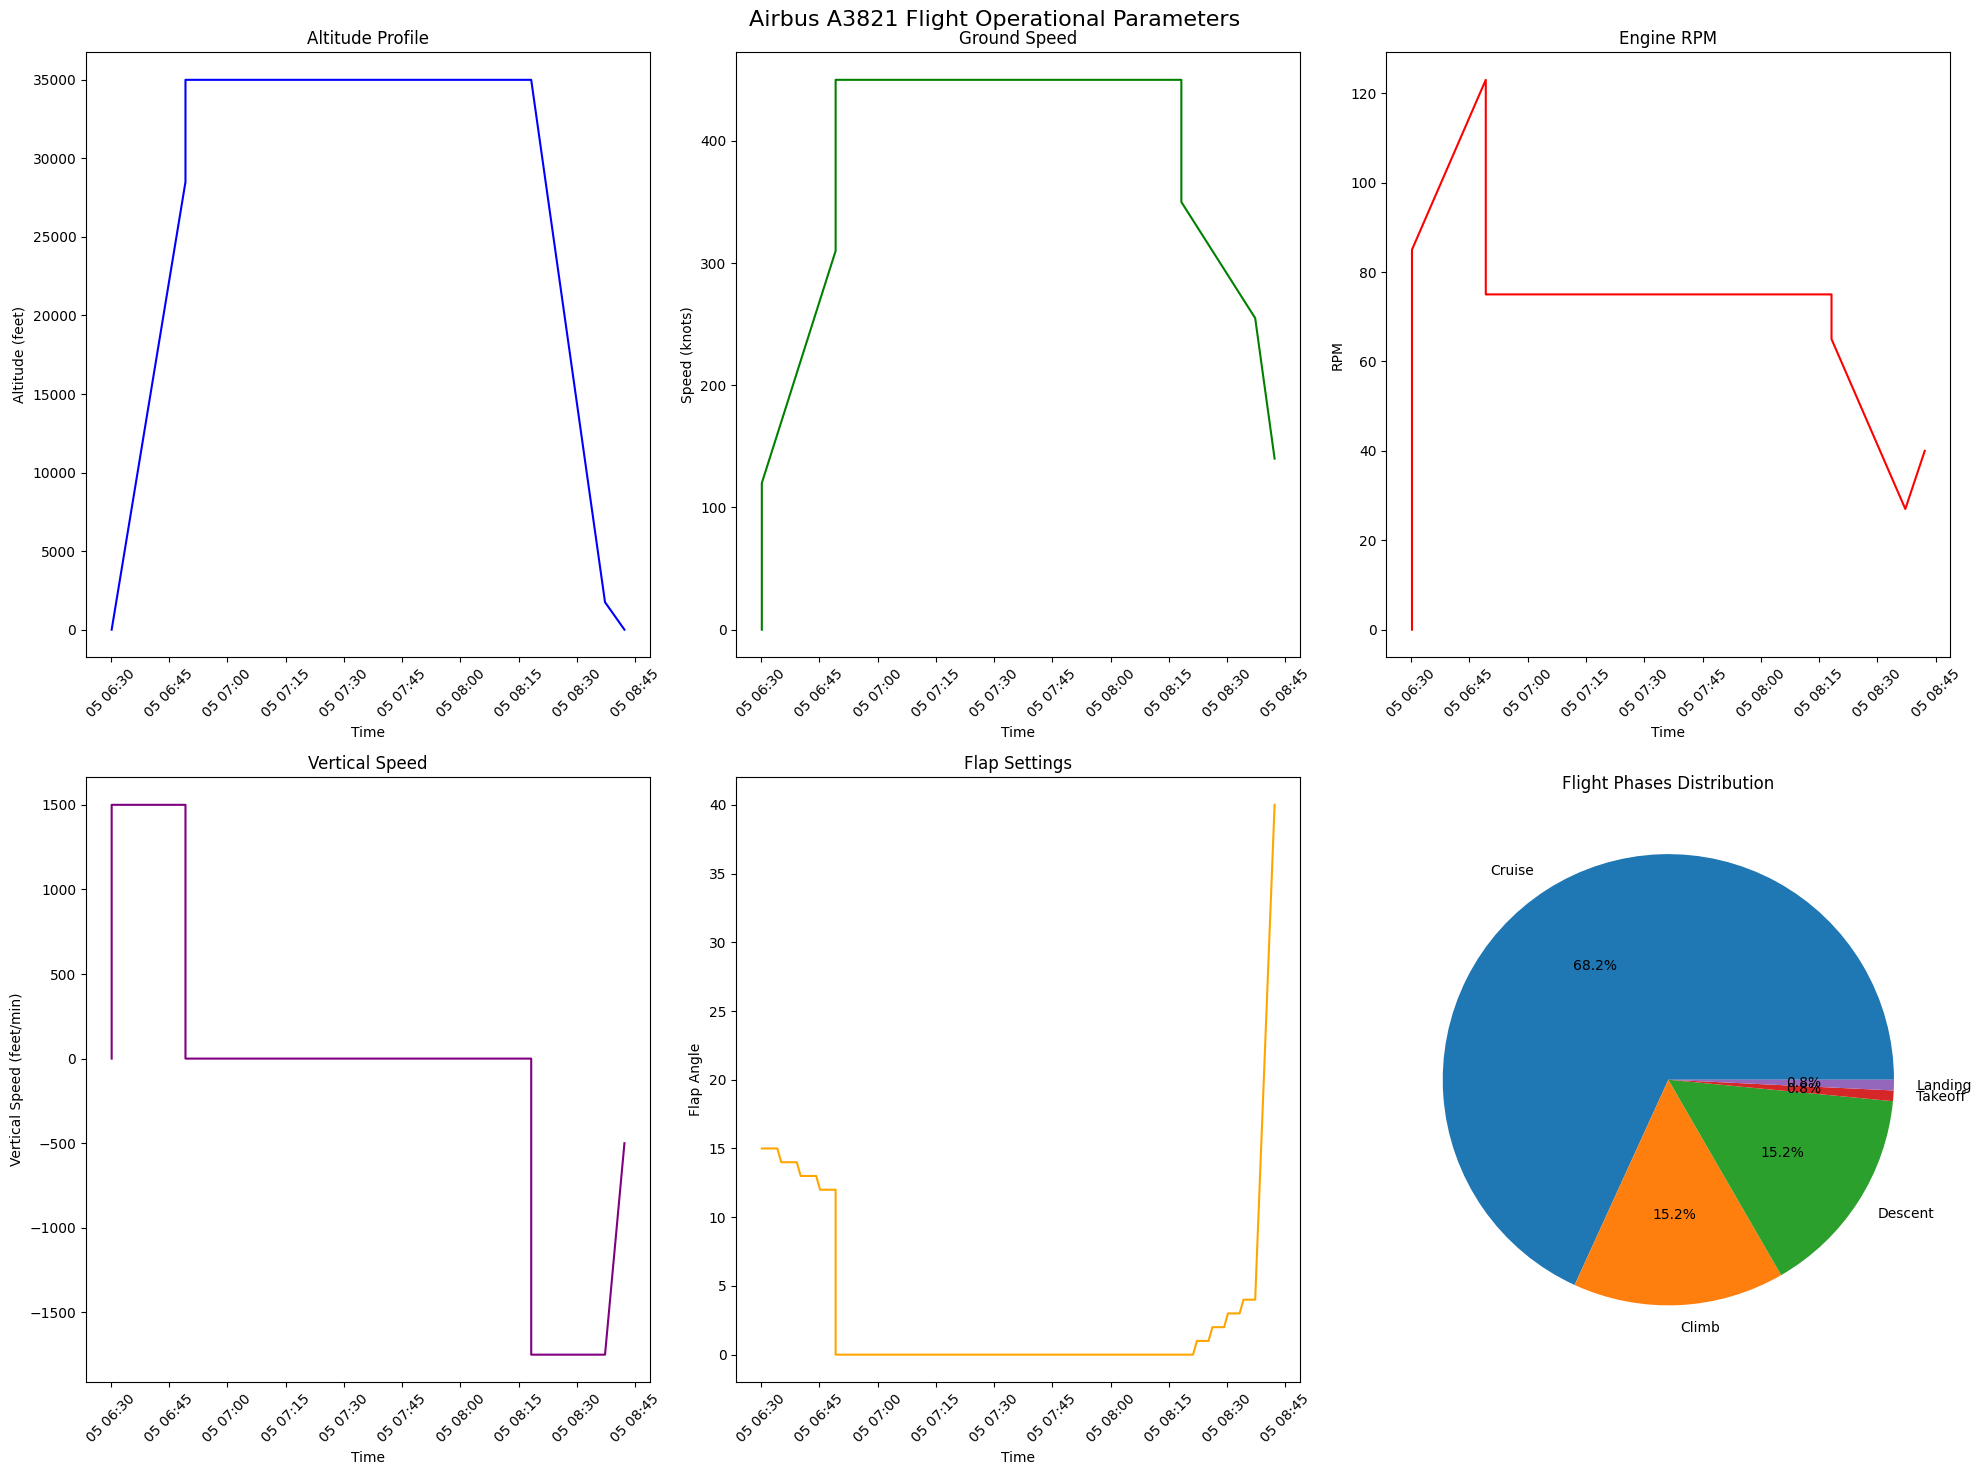

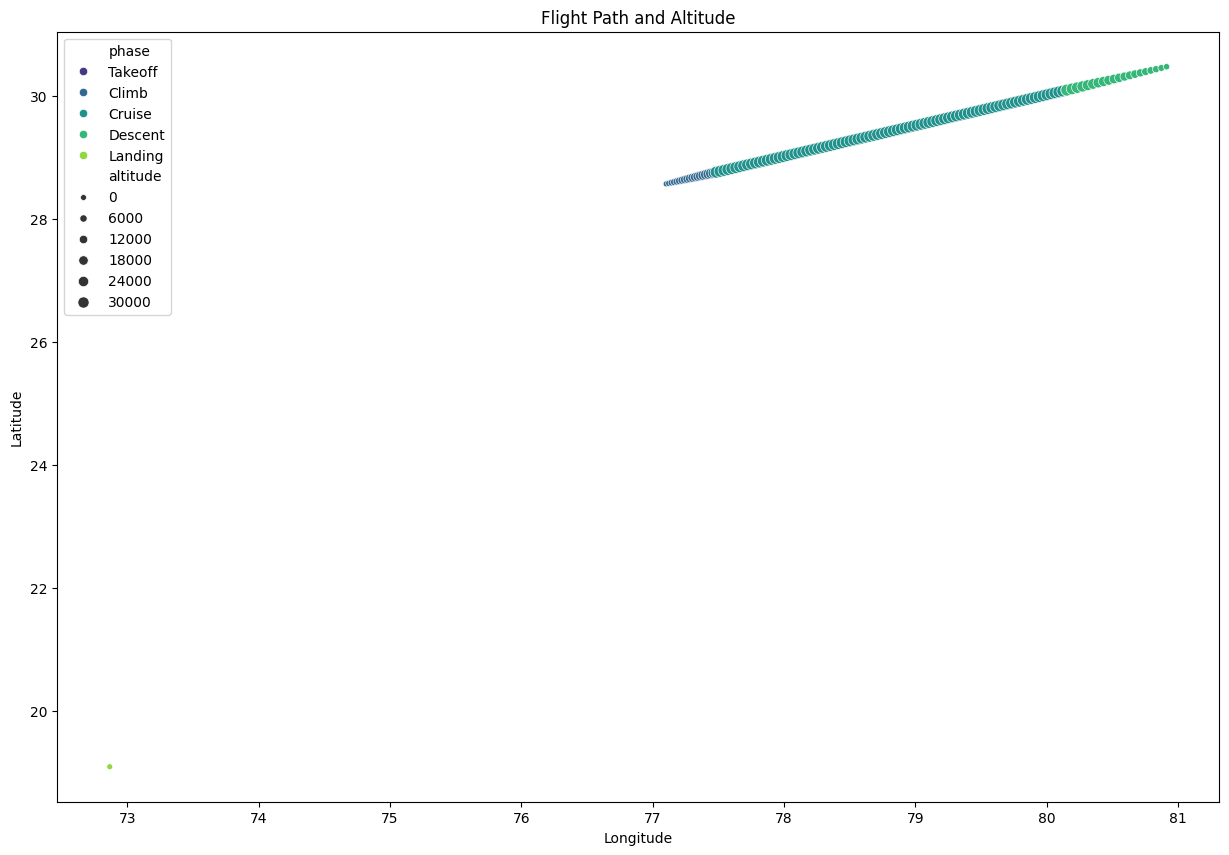

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load flight log
flight_log_df = pd.read_csv('airbus_a3821_flight_log.csv')
flight_log_df['timestamp'] = pd.to_datetime(flight_log_df['timestamp'])

# Create a multi-panel visualization
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Altitude over Time
plt.subplot(2, 3, 1)
plt.plot(flight_log_df['timestamp'], flight_log_df['altitude'], color='blue')
plt.title('Altitude Profile')
plt.xlabel('Time')
plt.ylabel('Altitude (feet)')
plt.xticks(rotation=45)

# 2. Ground Speed over Time
plt.subplot(2, 3, 2)
plt.plot(flight_log_df['timestamp'], flight_log_df['ground_speed'], color='green')
plt.title('Ground Speed')
plt.xlabel('Time')
plt.ylabel('Speed (knots)')
plt.xticks(rotation=45)

# 3. Engine RPM over Time
plt.subplot(2, 3, 3)
plt.plot(flight_log_df['timestamp'], flight_log_df['engine_rpm'], color='red')
plt.title('Engine RPM')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.xticks(rotation=45)

# 4. Vertical Speed over Time
plt.subplot(2, 3, 4)
plt.plot(flight_log_df['timestamp'], flight_log_df['vertical_speed'], color='purple')
plt.title('Vertical Speed')
plt.xlabel('Time')
plt.ylabel('Vertical Speed (feet/min)')
plt.xticks(rotation=45)

# 5. Flap Settings over Time
plt.subplot(2, 3, 5)
plt.plot(flight_log_df['timestamp'], flight_log_df['flap_setting'], color='orange')
plt.title('Flap Settings')
plt.xlabel('Time')
plt.ylabel('Flap Angle')
plt.xticks(rotation=45)

# 6. Flight Phases Pie Chart
plt.subplot(2, 3, 6)
phase_counts = flight_log_df['phase'].value_counts()
plt.pie(phase_counts, labels=phase_counts.index, autopct='%1.1f%%')
plt.title('Flight Phases Distribution')

plt.suptitle('Airbus A3821 Flight Operational Parameters', fontsize=16)
plt.tight_layout()
plt.show()

# Flight Path Visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(data=flight_log_df, x='longitude', y='latitude', hue='phase', size='altitude', palette='viridis')
plt.title('Flight Path and Altitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()